Cells can be code which executed, or text (markdown) which can used to put in comments etc

Boilerplate code to setup pandas and matplotlib so we can see diagrams as part of the notebook

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Load in CSV file (same as in Excel File->Open)

This was downloaded from http://projects.fivethirtyeight.com/general-model/president_general_polls_2016.csv

In [2]:
polls = pd.read_csv('c:/dev/lse/polls.csv')

Look at first 5 rows to see what data is there

In [3]:
polls[:5]

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016


What columns do we have?

In [4]:
polls.columns

Index(['cycle', 'branch', 'type', 'matchup', 'forecastdate', 'state',
       'startdate', 'enddate', 'pollster', 'grade', 'samplesize', 'population',
       'poll_wt', 'rawpoll_clinton', 'rawpoll_trump', 'rawpoll_johnson',
       'rawpoll_mcmullin', 'adjpoll_clinton', 'adjpoll_trump',
       'adjpoll_johnson', 'adjpoll_mcmullin', 'multiversions', 'url',
       'poll_id', 'question_id', 'createddate', 'timestamp'],
      dtype='object')

What is the total size?

In [5]:
polls.shape

(12624, 27)

Find the distinct values in a column - I always find this awkward in excel

In [6]:
polls['type'].unique()

array(['polls-plus', 'now-cast', 'polls-only'], dtype=object)

In [7]:
polls['grade'].unique()

array(['A+', 'B', 'A-', 'B-', 'A', nan, 'B+', 'C+', 'C-', 'C', 'D'], dtype=object)

nan is Not A Number - similar to #VALUE in Excel

Now lets filter on just one value for state, first of all see what values there are

In [8]:
polls['state'].unique()

array(['U.S.', 'New Mexico', 'Virginia', 'Iowa', 'Wisconsin',
       'North Carolina', 'Georgia', 'Florida', 'Oregon', 'Ohio',
       'South Carolina', 'New York', 'Michigan', 'Pennsylvania',
       'Missouri', 'New Hampshire', 'Arizona', 'Nevada', 'Colorado',
       'California', 'Washington', 'Texas', 'Utah', 'Illinois', 'Indiana',
       'Tennessee', 'Connecticut', 'Massachusetts', 'New Jersey', 'Kansas',
       'Kentucky', 'Minnesota', 'Oklahoma', 'Maryland', 'Alabama',
       'Nebraska', 'Louisiana', 'Maine', 'Arkansas', 'Alaska', 'Vermont',
       'Idaho', 'Mississippi', 'West Virginia', 'South Dakota', 'Montana',
       'Hawaii', 'Maine CD-1', 'Maine CD-2', 'Rhode Island',
       'Nebraska CD-3', 'Nebraska CD-1', 'Delaware', 'North Dakota',
       'District of Columbia', 'Nebraska CD-2', 'Wyoming'], dtype=object)

In [9]:
just_us = polls[polls['state'] == 'U.S.']

In [10]:
just_us.shape

(3318, 27)

Add a new column to the data that shows the correct applied to Trumps figures

In [11]:
polls['trump_correction'] = polls['adjpoll_trump'] - polls['rawpoll_trump']

Note this just did it over all rows in the data frame - no loops where needed since Pandas does it for you and does it in a pretty efficient manner

In [12]:
polls['trump_correction'].head(5)

0   -1.27570
1    5.52439
2   -0.18380
3   -0.07996
4   -0.66816
Name: trump_correction, dtype: float64

In [13]:
polls['trump_correction'].mean()

2.8390097239385295

Now I want to look at the corrections they were making state by state and see if any states standout - would mean the polling there is along way off? First get the mean of all the columns grouped by state

In [14]:
by_state= polls.groupby('state').mean()

Note this has grouped by state and then calculated mean for every column

In [15]:
by_state

,cycle,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,poll_id,question_id,trump_correction
state,,,,,,,,,,,,,,
Alabama,2016.0,631.465116,0.123095,31.619535,54.308140,5.485926,NaN,33.249876,57.375262,2.442760,NaN,46889.418605,73182.255814,3.067122
Alaska,2016.0,322.105263,0.246906,32.782632,40.212368,11.372432,NaN,35.561077,44.918988,8.514214,NaN,46788.236842,73369.210526,4.706620
Arizona,2016.0,875.658228,0.416341,40.974304,41.608734,7.193833,NaN,42.161243,44.427907,4.822121,NaN,46460.177215,72152.924051,2.819173
Arkansas,2016.0,399.222222,0.169863,34.714667,48.370222,6.651935,NaN,36.439381,51.687746,3.673315,NaN,46890.866667,73202.466667,3.317524
California,2016.0,1452.873239,0.297874,53.781690,29.478873,6.363696,NaN,55.303613,32.508618,3.515882,NaN,46112.802817,71574.394366,3.029745
Colorado,2016.0,905.887500,0.434265,42.568500,37.157750,9.458065,NaN,43.818264,39.864592,7.066313,NaN,46654.725000,72622.025000,2.706842
Connecticut,2016.0,549.772727,0.125713,47.096818,34.582500,6.747931,NaN,48.901436,38.087213,3.633760,NaN,46664.159091,72974.409091,3.504713
Delaware,2016.0,250.700000,0.109329,44.244750,32.220500,7.664138,NaN,46.191942,35.828049,4.572463,NaN,46988.125000,73413.200000,3.607548
District of Columbia,2016.0,201.192308,0.115561,68.569615,12.639615,4.475769,NaN,71.798939,17.910704,1.586316,NaN,47285.192308,73982.769231,5.271089


Pictures speak a thousand words and better than jsut figures to look for trends ...

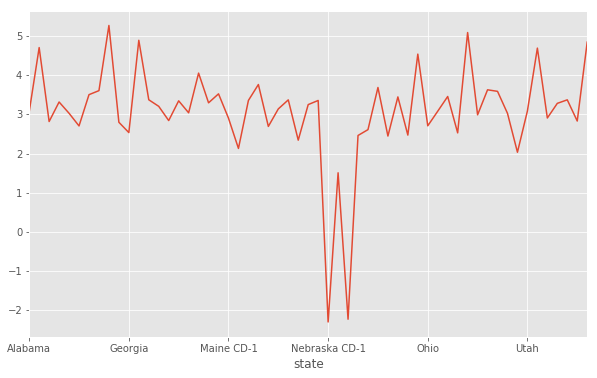

In [16]:
by_state['trump_correction'].plot()

Find the states that are corrected at the extremes

In [17]:
by_state[by_state['trump_correction'] < 2]['trump_correction']

state
Nebraska CD-1   -2.297390
Nebraska CD-2    1.510653
Nebraska CD-3   -2.227173
Name: trump_correction, dtype: float64

In [18]:
by_state[by_state['trump_correction'] > 4]['trump_correction']

state
Alaska                  4.706620
District of Columbia    5.271089
Hawaii                  4.892668
Kentucky                4.054609
North Dakota            4.539477
Rhode Island            5.090282
Vermont                 4.692966
Wyoming                 4.845866
Name: trump_correction, dtype: float64

In [19]:
polls['clinton_correction'] = polls['adjpoll_clinton'] - polls['rawpoll_clinton']

In [20]:
by_state['clinton_correction']

KeyError: 'clinton_correction'

OK, so we added a column to the original data set and it automatically appeared in the group one? Nope!

Pandas makes copies of the data frames generally so you need to reapply filters etc (though it does mean you keep copies of the data so you can go back to it ...)

In [21]:
by_state2 = polls.groupby('state').mean()

In [22]:
by_state2['clinton_correction'].head(2)

state
Alabama    1.630341
Alaska     2.778445
Name: clinton_correction, dtype: float64

Plot two columns at once ? Easy!

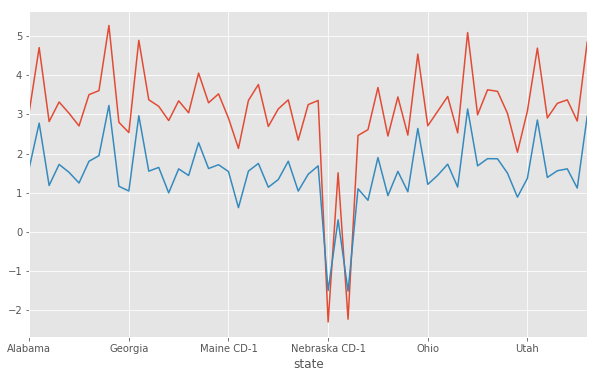

In [23]:
by_state2['trump_correction'].plot()
by_state2['clinton_correction'].plot()

In [24]:
by_state2['diff_correction'] = by_state2['trump_correction'] / by_state2['clinton_correction']

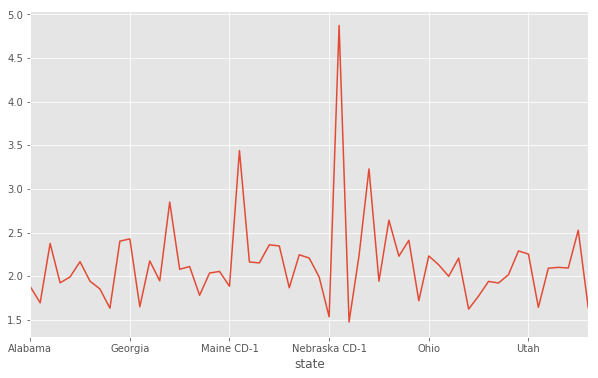

In [25]:
by_state2['diff_correction'].plot()

In [26]:
by_state2[by_state2['diff_correction']>2.5]

,cycle,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,poll_id,question_id,trump_correction,clinton_correction,diff_correction
state,,,,,,,,,,,,,,,,
Indiana,2016.0,684.035714,0.255464,35.856250,45.569286,9.176216,NaN,36.854219,48.413110,6.444548,NaN,46738.875000,72824.678571,2.843824,0.997969,2.849612
Maine CD-2,2016.0,406.785714,0.464253,38.485714,41.042857,9.355556,NaN,39.105499,43.174838,6.781227,NaN,46502.857143,72542.071429,2.131981,0.619784,3.439876
Nebraska CD-2,2016.0,550.000000,0.914363,40.000000,46.500000,8.000000,NaN,40.309925,48.010653,6.191103,NaN,47009.500000,73549.000000,1.510653,0.309925,4.874255
New Hampshire,2016.0,537.553571,0.344105,44.636696,37.730625,8.517568,NaN,45.445585,40.342968,6.534556,NaN,45934.750000,71322.062500,2.612343,0.808889,3.229546
New Mexico,2016.0,738.058824,0.327850,41.741961,33.967059,15.669500,NaN,42.668949,36.415527,13.197703,NaN,47099.176471,73553.431373,2.448468,0.926988,2.641314
Wisconsin,2016.0,937.550000,0.382017,44.152500,37.209750,7.226078,NaN,45.273477,40.041589,4.595392,NaN,45776.950000,71015.787500,2.831839,1.120977,2.526224


Just take Wisconsin and take the polls-plus (which are supposed to be the better polls)

In [27]:
Wisconsin = polls[(polls['state'] == 'Wisconsin') & (polls['type'] == 'polls-plus')]

In [28]:
Wisconsin.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp,trump_correction,clinton_correction
17,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,10/26/2016,10/31/2016,Marquette University,A,...,2.897062,NaN,NaN,https://twitter.com/MULawPoll,48095,75264,11/2/16,09:35:33 8 Nov 2016,0.97982,0.10344
34,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,11/1/2016,11/2/2016,Remington,NaN,...,NaN,NaN,NaN,http://docs.axiomstrategies.com/wp-content/upl...,48495,76001,11/6/16,09:35:33 8 Nov 2016,-2.13536,-0.77287
52,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,11/1/2016,11/2/2016,Clarity Campaign Labs,B,...,4.024297,NaN,NaN,http://projects.fivethirtyeight.com/polls/1107...,48621,76170,11/7/16,09:35:33 8 Nov 2016,-0.05156,0.83631
66,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,11/3/2016,11/6/2016,Gravis Marketing,B-,...,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/multi-state...,48858,76454,11/7/16,09:35:33 8 Nov 2016,-0.66661,-0.15564
69,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,10/31/2016,11/1/2016,Public Policy Polling,B+,...,NaN,NaN,NaN,https://cdn.americanprogress.org/content/uploa...,48330,75703,11/4/16,09:35:33 8 Nov 2016,-1.21398,-1.26677


In [29]:
Wisconsin['type'].unique()

array(['polls-plus'], dtype=object)

Now we are going to plot just for Wisconsin by date, we do that by changing the index on the data frame

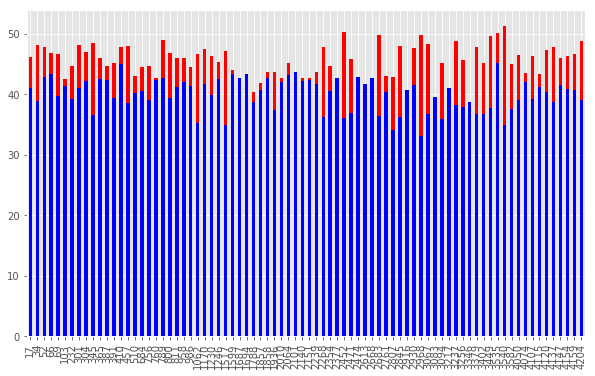

In [30]:
Wisconsin.set_index(['enddate'])
Wisconsin['adjpoll_clinton'].plot(kind='bar', color='red')
Wisconsin['adjpoll_trump'].plot(kind='bar', color='blue')